# EECS 4404/5327 Project Part 5 

#### Aum Patel (218153338), Hrushi Patel (218534206), Huy Vuong (217746801) 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#model evaluation form sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# one hot encoder from scikit learn
from sklearn.preprocessing import OneHotEncoder

# imputer from scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [28]:
df1 = pd.read_csv("loan-train.csv")


In [29]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
print(df1.shape)

(614, 13)


In [31]:
# working on df1 to clean the dataset
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Object types - Gender, Married, 

In [33]:
df_train = df1

In [34]:
df_train.shape

(614, 13)

### Data Pre-Processing

In [35]:
#Replace the missing value with mode using 'fiilna' method
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)

#Replace the missing values for numerical columns with mean
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)

#Replace the missing values for categorical columns with mode
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)

df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
# Label encoding for categorical variables
lb=LabelEncoder()
df_train['Gender']=lb.fit_transform(df_train['Gender'])
df_train['Married']=lb.fit_transform(df_train['Married'])
df_train['Education']=lb.fit_transform(df_train['Education'])
df_train['Self_Employed']=lb.fit_transform(df_train['Self_Employed'])
df_train['Property_Area']=lb.fit_transform(df_train['Property_Area'])
df_train['Loan_Status']=lb.fit_transform(df_train['Loan_Status'])

In [37]:
# Log transformation of numerical features to address skewness
df_train['LoanAmount_log'] = np.log1p(df_train['LoanAmount']) 
df_train['ApplicantIncome_log'] = np.log1p(df_train['ApplicantIncome']) 
df_train['CoapplicantIncome_log'] = np.log1p(df_train['CoapplicantIncome'])

# Feature engineering to create new features
df_train['TotalIncome'] = np.log1p(df_train['ApplicantIncome']+df_train['CoapplicantIncome'])
df_train['TotalIncome_log'] = np.log1p(df_train['TotalIncome']) 
df_train['EMI']=df_train['LoanAmount']/df_train['Loan_Amount_Term'] 
df_train['Balance_Income']=df_train['TotalIncome']-(df_train['EMI']*1000)
df_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome'],
           axis=1, inplace=True) 


In [38]:
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,0,0,1.0,2,1,4.993232,8.674197,0.000000,2.269462,0.406700,-398.026254
1,LP001003,1,1,1,0,0,1.0,0,0,4.859812,8.430327,7.319202,2.273643,0.355556,-346.840824
2,LP001005,1,1,0,0,1,1.0,2,1,4.204693,8.006701,0.000000,2.197969,0.183333,-175.326632
3,LP001006,1,1,0,1,0,1.0,2,1,4.795791,7.857094,7.765993,2.251873,0.333333,-324.827808
4,LP001008,1,0,0,0,0,1.0,2,1,4.955827,8.699681,0.000000,2.272093,0.391667,-382.966985
5,LP001011,1,1,2,0,1,1.0,2,1,5.590987,8.597482,8.342125,2.319538,0.741667,-732.495691
6,LP001013,1,1,0,1,0,1.0,2,1,4.564348,7.755339,7.324490,2.225253,0.263889,-255.633060
7,LP001014,1,1,3+,0,0,0.0,1,0,5.068904,8.018625,7.826044,2.263837,0.438889,-430.268959
8,LP001018,1,1,2,0,0,1.0,2,1,5.129899,8.295798,7.331060,2.263687,0.466667,-458.048181
9,LP001020,1,1,1,0,0,1.0,1,0,5.857933,9.460476,9.302828,2.404949,0.969444,-959.366584


In [39]:
# Adjust 'Dependents' values
df_train['Dependents'].replace('0', 0,inplace=True) 
df_train['Dependents'].replace('1', 1,inplace=True) 
df_train['Dependents'].replace('2', 2,inplace=True) 
df_train['Dependents'].replace('3+', 3,inplace=True) 

df_train['Dependents'].replace('0', 0,inplace=True) 
df_train['Dependents'].replace('1', 1,inplace=True) 
df_train['Dependents'].replace('2', 2,inplace=True) 
df_train['Dependents'].replace('3+', 3,inplace=True) 

### Training the model

In [40]:
X=df_train.drop(['Loan_ID','Loan_Status'],axis=1)
y=df_train['Loan_Status']
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size =0.2)


In [41]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=150),
     "SVM": SVC()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    :param models: 
    :param X_train: 
    :param X_test: 
    :param y_train: 
    :param y_test: 
    :return: 
    '''
    
    #set the random seed 
    np.random.seed(42)
    
    # making dictionary to keep model scores 
    model_scores = {}
    # making dictionary to keep confusion matrices
    confusion_matrices = {}
    # making dictionary to keep classification reports
    classification_reports = {}
    
    # looping through the model
    for name, model in models.items():
        # Fitting the model to the data
        model.fit(X_train,y_train)
        # Predicting on the test set
        y_pred = model.predict(X_test)
        # evaluating the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
        # Computing the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm
        # Generating the classification report
        report = classification_report(y_test, y_pred)
        classification_reports[name] = report
        
    return model_scores, confusion_matrices, classification_reports

### Evaluating the model

In [42]:
model_scores, confusion_matrices, classification_reports = fit_and_score(models, X_train, X_test, y_train, y_test)
# printing model scores
model_scores

C:\Users\aumpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aumpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aumpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'Logistic Regression': 0.814663951120163,
 'Random Forest': 0.7576374745417516,
 'SVM': 0.6965376782077393}

In [48]:
# printing confusion matrix for both models 
print("\nConfusion Matrices:")
for name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix for {name}:")
    print(cm)


Confusion Matrices:

Confusion Matrix for Logistic Regression:
[[ 65  84]
 [  7 335]]

Confusion Matrix for Random Forest:
[[ 72  77]
 [ 42 300]]

Confusion Matrix for SVM:
[[  0 149]
 [  0 342]]


In [49]:
# Print classification reports for each model
for name, report in classification_reports.items():
    print(f"Classification Report for {name}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.48      0.55       149
           1       0.80      0.88      0.83       342

    accuracy                           0.76       491
   macro avg       0.71      0.68      0.69       491
weighted avg       0.75      0.76      0.75       491


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.70      1.00      0.82       342

    accuracy                           0.70       491
   macr

#### Plotting a bar chart depicting the accuracy of different models 

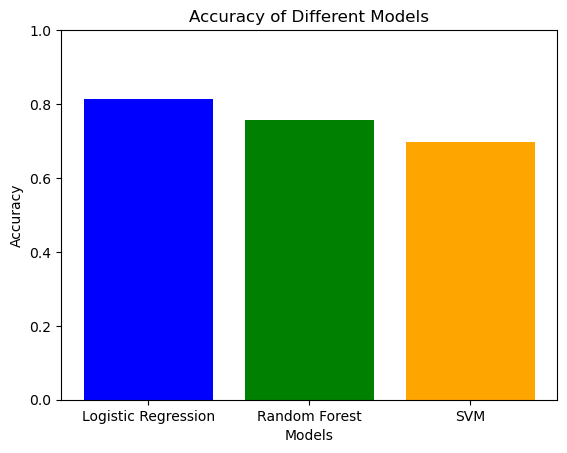

In [50]:
models = list(model_scores.keys())
accuracies = list(model_scores.values())

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])  # Set the y-axis limit to represent accuracy percentage (0-100%)
plt.show()

#### A bar chart to compare precision, recall, and F1-score for each model.

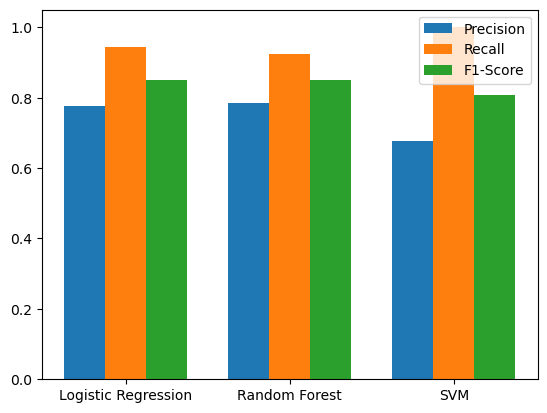

In [52]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
precision_scores = [0.775, 0.785, 0.678]
recall_scores = [0.943, 0.925, 1.0]
f1_scores = [0.851, 0.849, 0.808]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, precision_scores, width, label='Precision')
ax.bar(x, recall_scores, width, label='Recall')
ax.bar(x + width, f1_scores, width, label='F1-Score')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()